
Q1(a) Agglomerative Clustering using Minimum Distance (Single Linkage)
Initial points:
A: [4, 7]
B: [7, 9]
C: [5, 4]
D: [5, 2]

Step 0: Initial clusters
Cluster A: [[4, 7]]
Cluster B: [[7, 9]]
Cluster C: [[5, 4]]
Cluster D: [[5, 2]]

Step 1:
------------------------------
Distance Matrix (Single Linkage):
Clusters: ['A', 'B', 'C', 'D']
       A      B      C      D
A  0.000  3.606  3.162  5.099
B  3.606  0.000  5.385  7.280
C  3.162  5.385  0.000  2.000
D  5.099  7.280  2.000  0.000

Minimum distance: 2.000 between clusters C and D
Merged clusters C and D into (C,D)
Current clusters:
  A: [[4, 7]]
  B: [[7, 9]]
  (C,D): [[5, 4], [5, 2]]

Step 2:
------------------------------
Distance Matrix (Single Linkage):
Clusters: ['A', 'B', '(C,D)']
           A      B  (C,D)
A      0.000  3.606  3.162
B      3.606  0.000  5.385
(C,D)  3.162  5.385  0.000

Minimum distance: 3.162 between clusters A and (C,D)
Merged clusters A and (C,D) into (A,(C,D))
Current clusters:
  B: [[7, 9]]
  (A,(C,D)): 

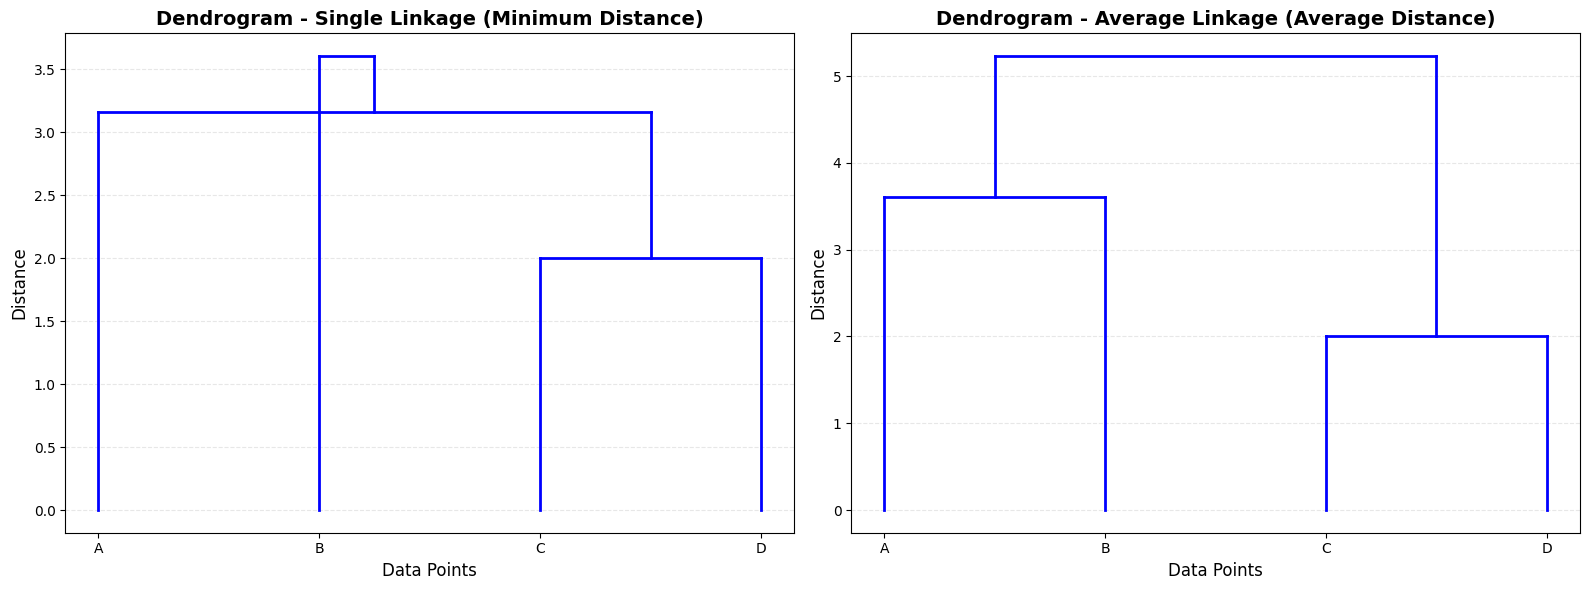

In [1]:
# Q1 Agglomerative Clustering - Single Linkage vs Average Linkage

import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Define the points
points = {"A": [4, 7], "B": [7, 9], "C": [5, 4], "D": [5, 2]}

# ============================================================================
# SHARED FUNCTIONS
# ============================================================================


def draw_dendrogram(merge_history, original_points, title, ax=None):
    """Draw dendrogram from merge history"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Track positions of clusters
    positions = {name: i for i, name in enumerate(sorted(original_points.keys()))}
    # Track heights for each cluster
    heights = {name: 0 for name in original_points.keys()}

    # Draw each merge
    for merge in merge_history:
        cluster1 = merge["cluster1"]
        cluster2 = merge["cluster2"]
        distance = merge["distance"]

        # Get positions
        pos1 = positions[cluster1]
        pos2 = positions[cluster2]

        # Get current heights
        h1 = heights[cluster1]
        h2 = heights[cluster2]

        # Draw vertical lines from current height to merge height
        ax.plot([pos1, pos1], [h1, distance], "b-", linewidth=2)
        ax.plot([pos2, pos2], [h2, distance], "b-", linewidth=2)

        # Draw horizontal line connecting them
        ax.plot([pos1, pos2], [distance, distance], "b-", linewidth=2)

        # Update positions and heights for new cluster
        new_cluster = f"({cluster1},{cluster2})"
        new_pos = (pos1 + pos2) / 2
        positions[new_cluster] = new_pos
        heights[new_cluster] = distance

    # Set labels
    ax.set_xticks(range(len(original_points)))
    ax.set_xticklabels(sorted(original_points.keys()))
    ax.set_ylabel("Distance", fontsize=12)
    ax.set_xlabel("Data Points", fontsize=12)
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.grid(axis="y", alpha=0.3, linestyle="--")

    return ax


# ============================================================================
# Q1(a) SINGLE LINKAGE
# ============================================================================


def calculate_distance_matrix_single(clusters):
    """Calculate distance matrix between all clusters using single linkage (minimum distance)"""
    cluster_names = list(clusters.keys())
    n = len(cluster_names)
    dist_matrix = np.zeros((n, n))

    print("Distance Matrix (Single Linkage):")
    print("Clusters:", cluster_names)

    for i in range(n):
        for j in range(n):
            if i == j:
                dist_matrix[i][j] = 0
            else:
                # Single linkage: minimum distance between any two points
                min_dist = float("inf")
                for point1 in clusters[cluster_names[i]]:
                    for point2 in clusters[cluster_names[j]]:
                        dist = euclidean(point1, point2)
                        min_dist = min(min_dist, dist)
                dist_matrix[i][j] = min_dist

    # Print matrix
    df = pd.DataFrame(dist_matrix, index=cluster_names, columns=cluster_names)
    print(df.round(3))
    print()
    return dist_matrix, cluster_names


def agglomerative_clustering_single(points):
    """Perform agglomerative clustering using single linkage"""
    print("\n" + "=" * 60)
    print("Q1(a) Agglomerative Clustering using Minimum Distance (Single Linkage)")
    print("=" * 60)
    print("Initial points:")
    for name, coords in points.items():
        print(f"{name}: {coords}")
    print()

    # Initialize clusters (each point is its own cluster)
    clusters = {name: [coords] for name, coords in points.items()}
    print("Step 0: Initial clusters")
    for name, cluster in clusters.items():
        print(f"Cluster {name}: {cluster}")
    print()

    # Store merge history for dendrogram
    merge_history = []
    step = 1

    while len(clusters) > 1:
        print(f"Step {step}:")
        print("-" * 30)

        # Calculate distance matrix
        dist_matrix, cluster_names = calculate_distance_matrix_single(clusters)

        # Find minimum distance
        n = len(cluster_names)
        min_dist = float("inf")
        merge_i, merge_j = -1, -1

        for i in range(n):
            for j in range(i + 1, n):
                if dist_matrix[i][j] < min_dist:
                    min_dist = dist_matrix[i][j]
                    merge_i, merge_j = i, j

        cluster1_name = cluster_names[merge_i]
        cluster2_name = cluster_names[merge_j]

        print(
            f"Minimum distance: {min_dist:.3f} between clusters {cluster1_name} and {cluster2_name}"
        )

        # Store merge information
        merge_history.append(
            {
                "cluster1": cluster1_name,
                "cluster2": cluster2_name,
                "distance": min_dist,
                "step": step,
            }
        )

        # Merge clusters
        new_cluster_name = f"({cluster1_name},{cluster2_name})"
        new_cluster = clusters[cluster1_name] + clusters[cluster2_name]

        # Create new clusters dict
        new_clusters = {}
        for name in clusters:
            if name != cluster1_name and name != cluster2_name:
                new_clusters[name] = clusters[name]
        new_clusters[new_cluster_name] = new_cluster

        clusters = new_clusters

        print(
            f"Merged clusters {cluster1_name} and {cluster2_name} into {new_cluster_name}"
        )
        print("Current clusters:")
        for name, cluster in clusters.items():
            print(f"  {name}: {cluster}")
        print()

        step += 1

    print("Final clustering completed!")
    print("Dendrogram structure:")
    for name, cluster in clusters.items():
        print(f"Root cluster: {name} containing points {cluster}")
    print()

    return merge_history


# ============================================================================
# Q1(b) AVERAGE LINKAGE
# ============================================================================


def calculate_distance_matrix_average(clusters):
    """Calculate distance matrix between all clusters using average linkage"""
    cluster_names = list(clusters.keys())
    n = len(cluster_names)
    dist_matrix = np.zeros((n, n))

    print("Distance Matrix (Average Linkage):")
    print("Clusters:", cluster_names)

    for i in range(n):
        for j in range(n):
            if i == j:
                dist_matrix[i][j] = 0
            else:
                # Average linkage: average distance between all pairs of points
                total_dist = 0
                count = 0
                for point1 in clusters[cluster_names[i]]:
                    for point2 in clusters[cluster_names[j]]:
                        dist = euclidean(point1, point2)
                        total_dist += dist
                        count += 1
                avg_dist = total_dist / count
                dist_matrix[i][j] = avg_dist

    # Print matrix
    df = pd.DataFrame(dist_matrix, index=cluster_names, columns=cluster_names)
    print(df.round(3))
    print()
    return dist_matrix, cluster_names


def agglomerative_clustering_average(points):
    """Perform agglomerative clustering using average linkage"""
    print("\n" + "=" * 60)
    print("Q1(b) Agglomerative Clustering using Average Distance (Average Linkage)")
    print("=" * 60)
    print("Initial points:")
    for name, coords in points.items():
        print(f"{name}: {coords}")
    print()

    # Initialize clusters (each point is its own cluster)
    clusters = {name: [coords] for name, coords in points.items()}
    print("Step 0: Initial clusters")
    for name, cluster in clusters.items():
        print(f"Cluster {name}: {cluster}")
    print()

    # Store merge history for dendrogram
    merge_history = []
    step = 1

    while len(clusters) > 1:
        print(f"Step {step}:")
        print("-" * 30)

        # Calculate distance matrix
        dist_matrix, cluster_names = calculate_distance_matrix_average(clusters)

        # Find minimum distance
        n = len(cluster_names)
        min_dist = float("inf")
        merge_i, merge_j = -1, -1

        for i in range(n):
            for j in range(i + 1, n):
                if dist_matrix[i][j] < min_dist:
                    min_dist = dist_matrix[i][j]
                    merge_i, merge_j = i, j

        cluster1_name = cluster_names[merge_i]
        cluster2_name = cluster_names[merge_j]

        print(
            f"Minimum average distance: {min_dist:.3f} between clusters {cluster1_name} and {cluster2_name}"
        )

        # Store merge information
        merge_history.append(
            {
                "cluster1": cluster1_name,
                "cluster2": cluster2_name,
                "distance": min_dist,
                "step": step,
            }
        )

        # Merge clusters
        new_cluster_name = f"({cluster1_name},{cluster2_name})"
        new_cluster = clusters[cluster1_name] + clusters[cluster2_name]

        # Create new clusters dict
        new_clusters = {}
        for name in clusters:
            if name != cluster1_name and name != cluster2_name:
                new_clusters[name] = clusters[name]
        new_clusters[new_cluster_name] = new_cluster

        clusters = new_clusters

        print(
            f"Merged clusters {cluster1_name} and {cluster2_name} into {new_cluster_name}"
        )
        print("Current clusters:")
        for name, cluster in clusters.items():
            print(f"  {name}: {cluster}")
        print()

        step += 1

    print("Final clustering completed!")
    print("Dendrogram structure:")
    for name, cluster in clusters.items():
        print(f"Root cluster: {name} containing points {cluster}")
    print()

    return merge_history


# ============================================================================
# MAIN EXECUTION
# ============================================================================

# Run single linkage clustering
merge_history_single = agglomerative_clustering_single(points)

# Run average linkage clustering
merge_history_average = agglomerative_clustering_average(points)

# Comparison
print("\n" + "=" * 60)
print("COMPARISON: Single Linkage vs Average Linkage")
print("=" * 60)
print("Note: The clustering process may yield different results")
print("depending on the linkage method used.")
print("- Single linkage: tends to create elongated clusters (chaining effect)")
print("- Average linkage: tends to create more compact, balanced clusters")
print()

# Create side-by-side dendrograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

draw_dendrogram(
    merge_history_single, points, "Dendrogram - Single Linkage (Minimum Distance)", ax1
)
draw_dendrogram(
    merge_history_average,
    points,
    "Dendrogram - Average Linkage (Average Distance)",
    ax2,
)

plt.tight_layout()
plt.show()



SINGLE LINKAGE - Cluster distribution:
cluster
0    997
1      1
2      1
3      1
Name: count, dtype: int64

COMPLETE LINKAGE - Cluster distribution:
cluster
0    292
1    239
2    231
3    238
Name: count, dtype: int64

AVERAGE LINKAGE - Cluster distribution:
cluster
0    245
1    245
2    232
3    278
Name: count, dtype: int64


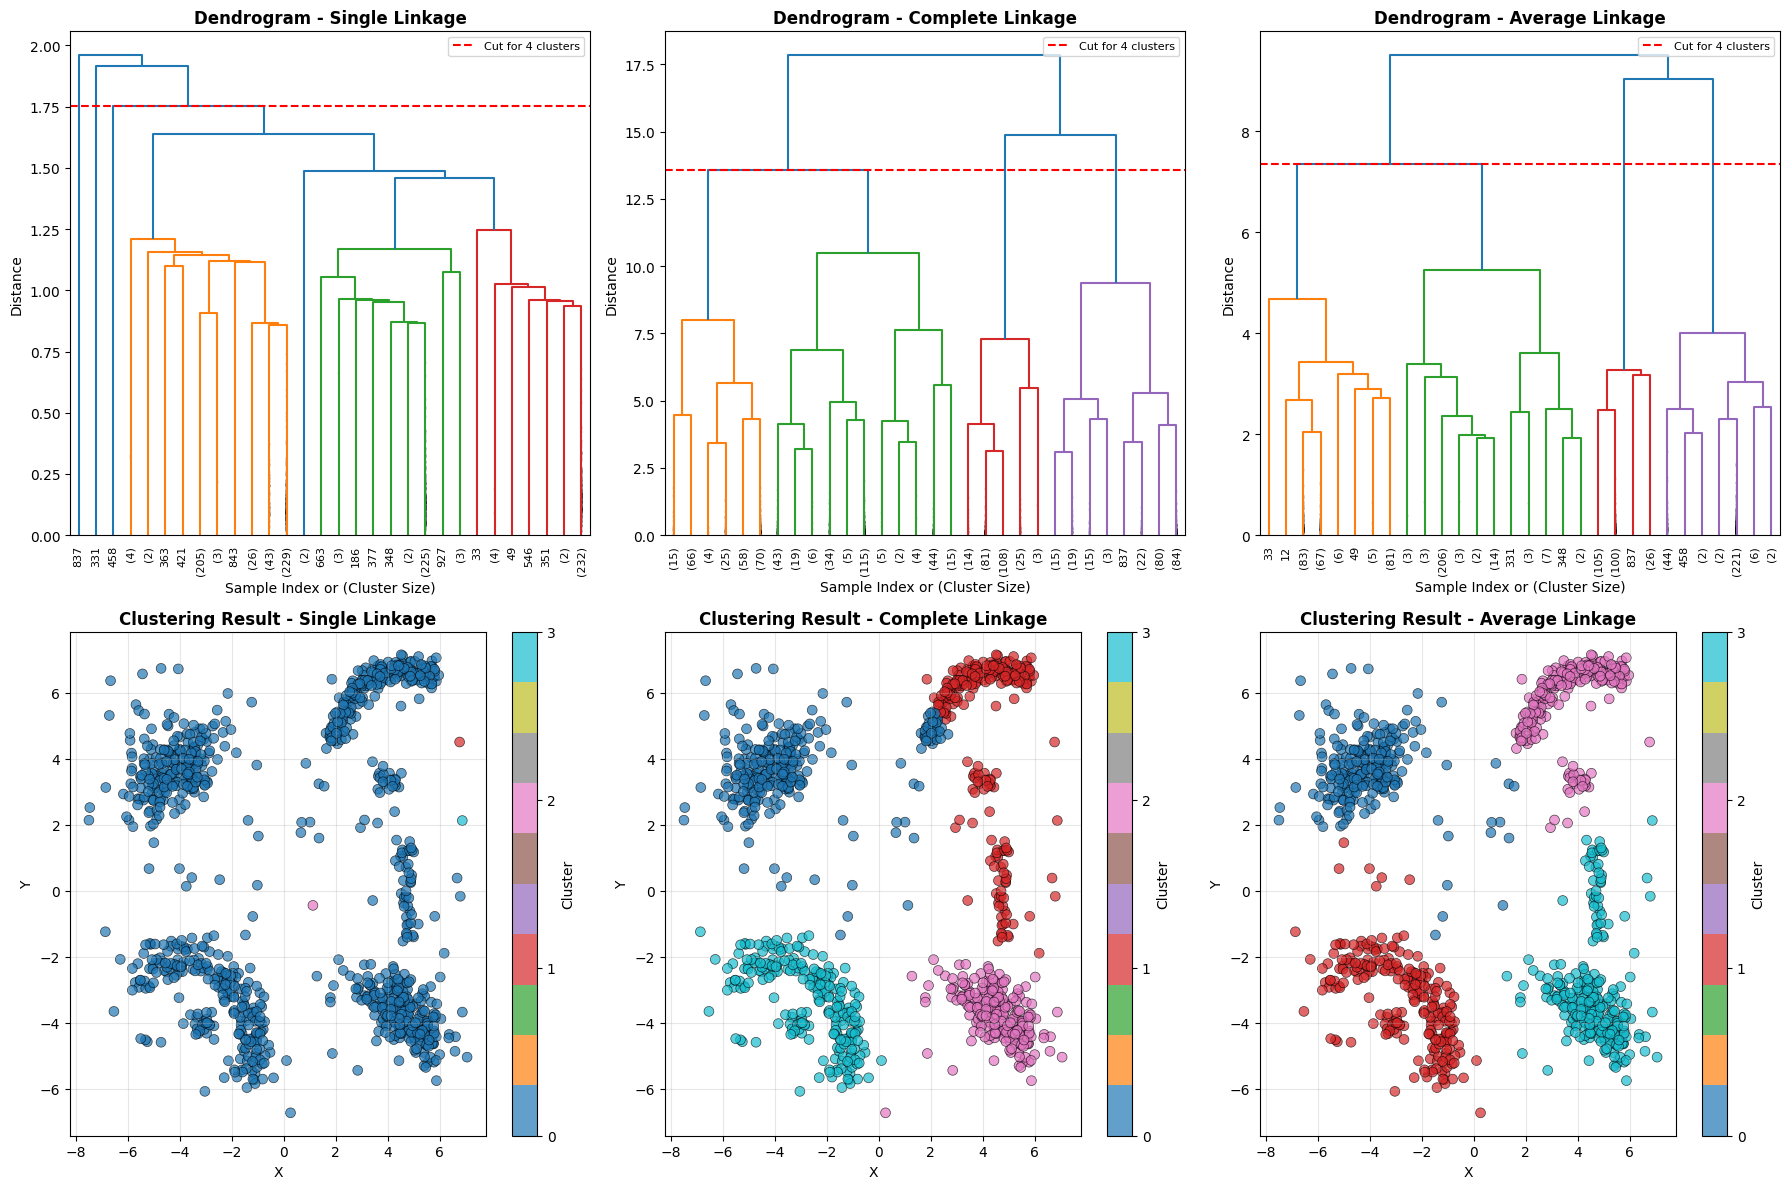


Total data points: 1000


In [2]:
# Q4 Agglomerative Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Read the CSV file
df = pd.read_csv("ASM3_q4_data.csv")

# Extract the data as a numpy array
X = df[["x", "y"]].values

# Define linkage methods
linkage_methods = ["single", "complete", "average"]

# Create a figure with subplots for all three methods
fig = plt.figure(figsize=(18, 12))

for idx, method in enumerate(linkage_methods):
    # Perform hierarchical clustering using scipy for dendrogram
    Z = linkage(X, method=method)

    # Plot dendrogram (top row)
    plt.subplot(2, 3, idx + 1)
    dendrogram(
        Z,
        truncate_mode="lastp",
        p=30,
        leaf_rotation=90,
        leaf_font_size=8,
        show_contracted=True,
    )
    plt.xlabel("Sample Index or (Cluster Size)", fontsize=10)
    plt.ylabel("Distance", fontsize=10)
    plt.title(
        f"Dendrogram - {method.capitalize()} Linkage", fontsize=12, fontweight="bold"
    )
    plt.axhline(
        y=Z[-3, 2], color="r", linestyle="--", linewidth=1.5, label="Cut for 4 clusters"
    )
    plt.legend(fontsize=8)

    # Perform clustering with 4 clusters
    clustering = AgglomerativeClustering(n_clusters=4, linkage=method)
    labels = clustering.fit_predict(X)

    # Create temporary dataframe for this method
    df_temp = df.copy()
    df_temp["cluster"] = labels

    # Plot scatter plot (bottom row)
    plt.subplot(2, 3, idx + 4)
    scatter = plt.scatter(
        df_temp["x"],
        df_temp["y"],
        c=df_temp["cluster"],
        cmap="tab10",
        alpha=0.7,
        s=50,
        edgecolors="black",
        linewidth=0.5,
    )
    plt.colorbar(scatter, label="Cluster", ticks=range(4))
    plt.xlabel("X", fontsize=10)
    plt.ylabel("Y", fontsize=10)
    plt.title(
        f"Clustering Result - {method.capitalize()} Linkage",
        fontsize=12,
        fontweight="bold",
    )
    plt.grid(True, alpha=0.3)

    # Print cluster distribution
    print(f"\n{method.upper()} LINKAGE - Cluster distribution:")
    print(df_temp["cluster"].value_counts().sort_index())

plt.tight_layout()
plt.show()

print(f"\nTotal data points: {X.shape[0]}")


In [3]:
for method in linkage_methods:
    print(f"\n{'=' * 60}")
    print(f"{method.upper()} LINKAGE - Cluster Analysis")
    print(f"{'=' * 60}")

    # Perform clustering with 4 clusters
    clustering = AgglomerativeClustering(n_clusters=4, linkage=method)
    labels = clustering.fit_predict(X)

    # For each cluster
    for cluster_id in range(4):
        # Get all points in this cluster
        cluster_points = X[labels == cluster_id]

        # Compute centroid (mean of all points)
        centroid = cluster_points.mean(axis=0)

        # Compute Euclidean distances from each point to centroid
        distances = np.sqrt(((cluster_points - centroid) ** 2).sum(axis=1))

        # Compute average distance
        avg_distance = distances.mean()

        # Report results
        print(f"\nCluster {cluster_id}:")
        # print(f"  Number of points: {len(cluster_points)}")
        print(f"  Centroid: ({centroid[0]:.4f}, {centroid[1]:.4f})")
        print(f"  Average distance to centroid: {avg_distance:.4f}")
        # print(f"  Min distance: {distances.min():.4f}")
        # print(f"  Max distance: {distances.max():.4f}")
        # print(f"  Std deviation: {distances.std():.4f}")



SINGLE LINKAGE - Cluster Analysis

Cluster 0:
  Centroid: (0.4632, 0.5547)
  Average distance to centroid: 5.6933

Cluster 1:
  Centroid: (6.7598, 4.5019)
  Average distance to centroid: 0.0000

Cluster 2:
  Centroid: (1.1194, -0.4474)
  Average distance to centroid: 0.0000

Cluster 3:
  Centroid: (6.8632, 2.1221)
  Average distance to centroid: 0.0000

COMPLETE LINKAGE - Cluster Analysis

Cluster 0:
  Centroid: (-3.1551, 3.7555)
  Average distance to centroid: 2.1884

Cluster 1:
  Centroid: (4.1457, 4.7431)
  Average distance to centroid: 2.5206

Cluster 2:
  Centroid: (4.5474, -3.7625)
  Average distance to centroid: 1.0639

Cluster 3:
  Centroid: (-2.7033, -3.3692)
  Average distance to centroid: 1.7510

AVERAGE LINKAGE - Cluster Analysis

Cluster 0:
  Centroid: (-4.0042, 3.6455)
  Average distance to centroid: 1.3566

Cluster 1:
  Centroid: (-2.7227, -3.2855)
  Average distance to centroid: 1.8215

Cluster 2:
  Centroid: (3.6195, 5.7403)
  Average distance to centroid: 1.5253

Clu

In [ ]:
# Q5 DBSCAN